# Práctica 1: Series Temporales
## Asignatura: Técnicas Avanzadas de Análisis de Datos
## Nombre: Manuel Alexander Arzola Santos

Una serie Temporal es una sucesión de datos medidos en determinado
momento y ordenados cronológicamente.

El objetivo de esta práctica es emplear técnicas de análisis de series temporales en un dataset real de manera práctica, permitiendo responder preguntas de utilidad con respecto a los datos.

El dataset se ha seleccionado en la página web de la Comisión Nacional de los Mercados y la Competencia, la cual es un organismo independendiente del Estado que promueve y preserva el buen funcionamiento de todos los mercados en interés de los consumidores y de las empresas. 

Link: https://www.cnmc.es/estadistica/estadistica-de-productos-petroliferos-cnmc

En el archivo excel que se puede encontrar en la página constan diferentes tablas, en cada una de las cuales aparece información relativa al consumo, importación, exportación, etc, de hidrocarburos en todo el territorio español. De entre todos los datos he seleccionado los de PVP (precio de venta al público) a nivel nacional con frecuencia diaria, entre el 1 de enero de 2007 al 31 de mayo de 2022.

Los combustibles de los que se recogen los precios son los siguientes:

- Biodiésel: Biodiésel puro y mezclas etiquetadas de gasóleo y biodiésel.
- Gasóleo A: Gasóleo de automoción.
- Gasóleo B: Gasóleo para uso agrícola y marítimo.
- Gasolina Auto S/PB 95 I.O. E5: Gasolina de 95 octanos con un contenido máximo de etanol del 5% en volumen.
- Gasolina Auto S/PB 98 I.O. E5: Gasolina de 98 octanos con un contenido máximo de etanol del 5% en volumen.
- Gasóleo A Premium (GOA+): Gasóleo de automoción de características mejoradas.

Las posibles preguntas que se va a intentar responder son las siguientes:

- ¿Afectan las diferentes crisis mundiales al precio de los combustibles?
- ¿Es diferente el comportamiento de los precios de los distintos combustibles?

Por otra parte, vamos a intentar elaborar un modelo que prediga el comportamiento futuro de los precios

# 1 Inicialización del entorno




In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
%matplotlib notebook
%matplotlib inline
from matplotlib import style
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import matplotlib
import matplotlib.pyplot as plt
style.use('ggplot') or plt.style.use('ggplot')

import missingno as msno

# Preprocesado y modelado
# ==============================================================================
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)



from datetime import datetime, timedelta, date
import os

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

from statsmodels.tools.eval_measures import rmse

In [3]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 3.9 MB/s 
     |████████████████████████████████| 9.8 MB 38.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# 2 Lectura del dataset

## Carga de datos inicial

Cargamos el archivo .xlsx obtenido en el link mencionado.

In [ ]:
df_inicial = pd.read_excel('/content/drive/MyDrive/TAAD - Técnicas avanzadas de análisis de datos/Práctica 3 - Series temporales/Estadisticas_petroleo_junio_2022.xlsx', sheet_name = 'Prd')
df_inicial

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5634,20220527.0,27-MAY-2022,2022-05-27 00:00:00,2022-05-27 00:00:00,1.82,1.125,1.84,1.159,1.463,1.113,1.928,1.233,1.955,1.163,2.095,1.263
5635,20220528.0,28-MAY-2022,2022-05-28 00:00:00,2022-05-28 00:00:00,1.823,1.127,1.847,1.165,1.469,1.118,1.934,1.239,1.964,1.171,2.103,1.27
5636,20220529.0,29-MAY-2022,2022-05-29 00:00:00,2022-05-29 00:00:00,1.821,1.126,1.851,1.168,1.472,1.119,1.939,1.242,1.969,1.174,2.108,1.274
5637,20220530.0,30-MAY-2022,2022-05-30 00:00:00,2022-05-30 00:00:00,1.839,1.141,1.858,1.172,1.475,1.122,1.947,1.247,1.98,1.182,2.121,1.281


Retocamos el dataset obtenido para que sólo queden las columnas y filas deseadas.

In [ ]:
df = df_inicial.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15'], axis=1)
df.set_axis(df.iloc[7], axis='columns', inplace=True)
df.drop(range(0,9,1), axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

7,FECHA,BIODIESEL,GASÓLEO A,GASÓLEO B,GASÓLEO A PREMIUM,GASOLINA AUTO. S/PB 95 I.O. E5,GASOLINA AUTO. S/PB 98 I.O. E5
0,01-ENE-2007,0.915,0.902,0.663,0.948,0.956,1.068
1,02-ENE-2007,0.916,0.903,0.663,0.948,0.956,1.068
2,03-ENE-2007,0.915,0.902,0.663,0.947,0.956,1.067
3,04-ENE-2007,0.915,0.902,0.663,0.947,0.955,1.067
4,05-ENE-2007,0.914,0.902,0.663,0.947,0.955,1.067
...,...,...,...,...,...,...,...
5625,27-MAY-2022,1.82,1.84,1.463,1.928,1.955,2.095
5626,28-MAY-2022,1.823,1.847,1.469,1.934,1.964,2.103
5627,29-MAY-2022,1.821,1.851,1.472,1.939,1.969,2.108
5628,30-MAY-2022,1.839,1.858,1.475,1.947,1.98,2.121


## Fecha

En este apartado modificamos la columna FECHA para que el tipo de datos sea datetime, paso necesario para representar adecuadamente las series temporales. También guardamos el dataframe resultante para no tener que realizar los pasos anteriores en el futuro.

In [ ]:
!locale -a

C
C.UTF-8
en_US.utf8
es_ES
es_ES.iso88591
POSIX
spanish


In [ ]:
import os

!/usr/share/locales/install-language-pack es_ES
!dpkg-reconfigure locales

# Restart Python process to pick up the new locales
os.kill(os.getpid(), 9)

Generating locales (this might take a while)...
  es_ES.ISO-8859-1... done
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  es_ES.ISO-8859-1... done
Generation complete.


In [ ]:
import locale

# Idioma "es-ES" (código para el español de España)
locale.setlocale(locale.LC_ALL, 'spanish')

'spanish'

In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format="%d-%b-%Y")

In [ ]:
df.to_csv("/content/drive/MyDrive/TAAD - Técnicas avanzadas de análisis de datos/Práctica 3 - Series temporales/petrodataset.csv", index=False)

## Carga de datos final

In [5]:
df = pd.read_csv('/content/drive/MyDrive/TAAD - Técnicas avanzadas de análisis de datos/Práctica 3 - Series temporales/petrodataset.csv', sep=",")
df['FECHA'] = pd.to_datetime(df['FECHA'], format = '%Y-%m-%d')
df.head()

,FECHA,BIODIESEL,GASÓLEO A,GASÓLEO B,GASÓLEO A PREMIUM,GASOLINA AUTO. S/PB 95 I.O. E5,GASOLINA AUTO. S/PB 98 I.O. E5
0,2007-01-01,0.915,0.902,0.663,0.948,0.956,1.068
1,2007-01-02,0.916,0.903,0.663,0.948,0.956,1.068
2,2007-01-03,0.915,0.902,0.663,0.947,0.956,1.067
3,2007-01-04,0.915,0.902,0.663,0.947,0.955,1.067
4,2007-01-05,0.914,0.902,0.663,0.947,0.955,1.067


# 3 Análisis exploratorio de datos

Aquí podemos ver el número de registros, 5630, y de variables, 7, de las cuales 6 son los diferentes hidrocarburos y la variable restante la fecha.

In [ ]:
print(f'Número de columnas: {df.shape[1]}')
print(f'Número de registros: {df.shape[0]}')

Número de columnas: 7
Número de registros: 5630


Comprobamos que la serie temporal está completa.

In [ ]:
dataset = df.set_index('FECHA')
(dataset.index == pd.date_range(start=dataset.index.min(),
                              end=dataset.index.max(),
                              freq=dataset.index.freq)).all()

True

## 3.1 Análisis de valores perdidos

Comprobamos el tipo de datos de las variables y si contienen valores nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   FECHA                            5630 non-null   datetime64[ns]
 1   BIODIESEL                        5630 non-null   float64       
 2   GASÓLEO A                        5630 non-null   float64       
 3   GASÓLEO B                        5630 non-null   float64       
 4   GASÓLEO A PREMIUM                5630 non-null   float64       
 5   GASOLINA  AUTO. S/PB 95 I.O. E5  5630 non-null   float64       
 6   GASOLINA  AUTO. S/PB 98 I.O. E5  5630 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 308.0 KB


In [ ]:
df.isna().sum().sort_values()

FECHA                              0
BIODIESEL                          0
GASÓLEO A                          0
GASÓLEO B                          0
GASÓLEO A PREMIUM                  0
GASOLINA  AUTO. S/PB 95 I.O. E5    0
GASOLINA  AUTO. S/PB 98 I.O. E5    0
dtype: int64

Como podemos ver, no hay valores perdidos en ninguna de las variables, por lo que no hace falta realizar ningún tipo de técnica a este respecto.

## 3.2 Visualización de los datos

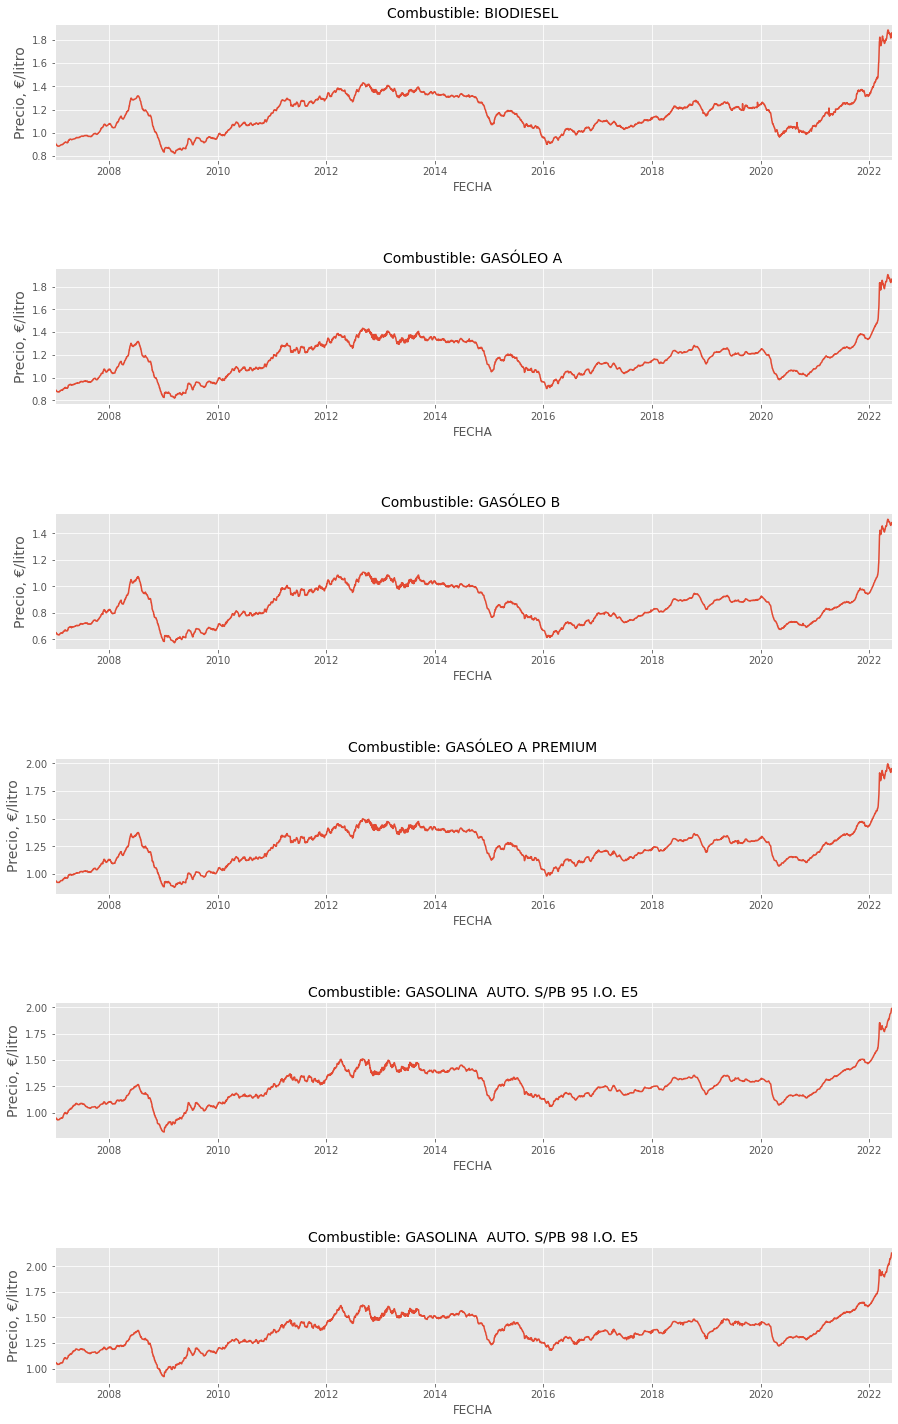

In [ ]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('FECHA', axis=1).columns):
    sns.lineplot(x=df['FECHA'], y=df[column].fillna(method='ffill'), ax=ax[i])
    ax[i].set_title('Combustible: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel='Precio, €/litro', fontsize=14) 

    ax[i].set_xlim([date(2007, 1, 1), date(2022, 5, 31)]) 
plt.subplots_adjust(hspace = 0.8)

Aquí podemos ver que el comportamiento de los precios para los distintos combustibles es prácticamente igual: a pesar de que el precio en €/litro puede variar de un combustible a otro, las bajadas, subidas, picos, valles, máximos y mínimos parecen darse aproximadamente en los mismos momentos de la historia.

Esto tiene sentido, ya que al tratarse de hidrocarburos el comportamiento está ligado al precio del barril de petróleo, el cual es un importante recurso geoestratégico cuyos vaivenes dependen fundamentalmente de variables exógenas.

Por ejemplo, puede apreciarse el aumento del precio hasta mediados del 2008 a consecuencia de varios factores como una serie de huracanes que golpearon el golfo de México, donde Estados Unidos posee la mayoría de sus refinerías; o el rápido crecimiento de la demanda de China e India y la fijación de la oferta a cierto nivel por parte de los países productores. 

Por otra parte, puede apreciarse el desplome de precios que se produce en 2008 a raíz de la recesión causada por la crisis económica mundial, y la subsecuente disminución de la demanda; así como la posterior recuperación de los precios debido a factores como la primavera árabe o la crisis nuclear en Irán de 2011.

También se aprecia claramente la bajada de precios derivada de la pandemia en 2020 y el súbito aumento de los precios como consecuencia de la reciente guerra en Ucrania, debido a que Rusia es uno de los mayores exportadores de combustibles para toda Europa.

Por tanto, se puede afirmar que ver la evolución de precios de combustibles es echar un ojo a la historia mundial de los últimos 15 años.

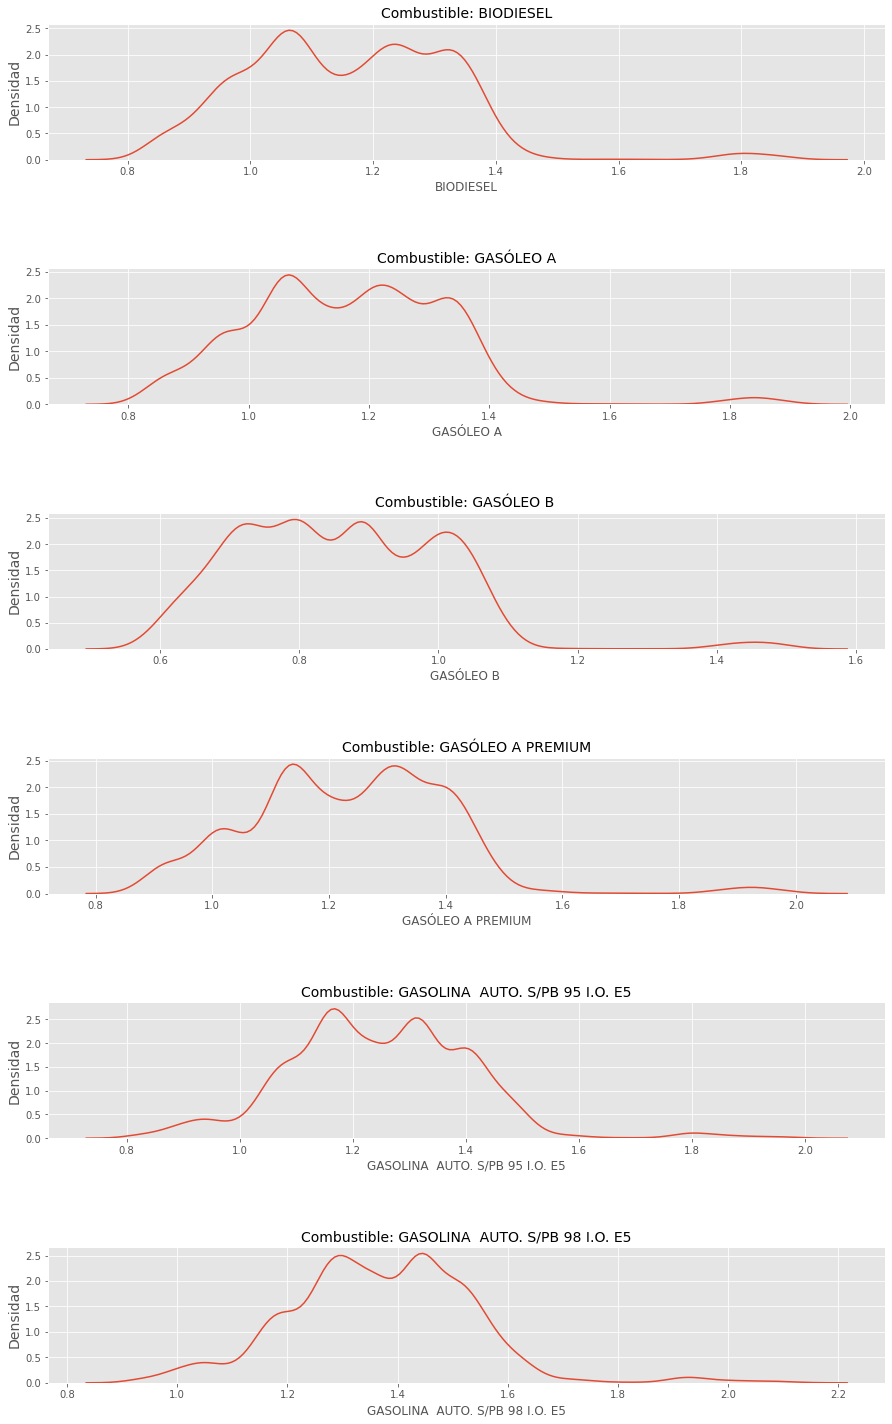

In [ ]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('FECHA', axis=1).columns):
    sns.kdeplot(data = df, x=df[column].fillna(method='ffill'), ax=ax[i])#, color='dodgerblue')
    ax[i].set_title('Combustible: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel='Densidad', fontsize=14) 
plt.subplots_adjust(hspace = 0.8)

Visualizando las distribuciones de los precios podemos comprobar de forma gráfica que generalmente se mantienen estables en torno a un cierto precio, que es más elevado para ciertos combustibles que para otros, lo que concuerda con los siguientes datos estadísticos.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BIODIESEL,5630.0,1.160825,0.167786,0.822,1.042,1.1580,1.281,1.883
GASÓLEO A,5630.0,1.165418,0.168595,0.820,1.050,1.1650,1.278,1.905
GASÓLEO B,5630.0,0.858763,0.149793,0.574,0.739,0.8510,0.973,1.507
GASÓLEO A PREMIUM,5630.0,1.236036,0.172267,0.876,1.122,1.2395,1.349,1.996
GASOLINA AUTO. S/PB 95 I.O. E5,5630.0,1.248472,0.162220,0.815,1.150,1.2430,1.348,1.988
GASOLINA AUTO. S/PB 98 I.O. E5,5630.0,1.369443,0.165495,0.923,1.267,1.3660,1.475,2.128


## 3.3 Análisis de correlación entre las variables

Pese a que el comportamiento de los precios de los diferentes combustibles es prácticamente igual, he decidido realizar este análisis, para comprobar si se puede extraer alguna conclusión.

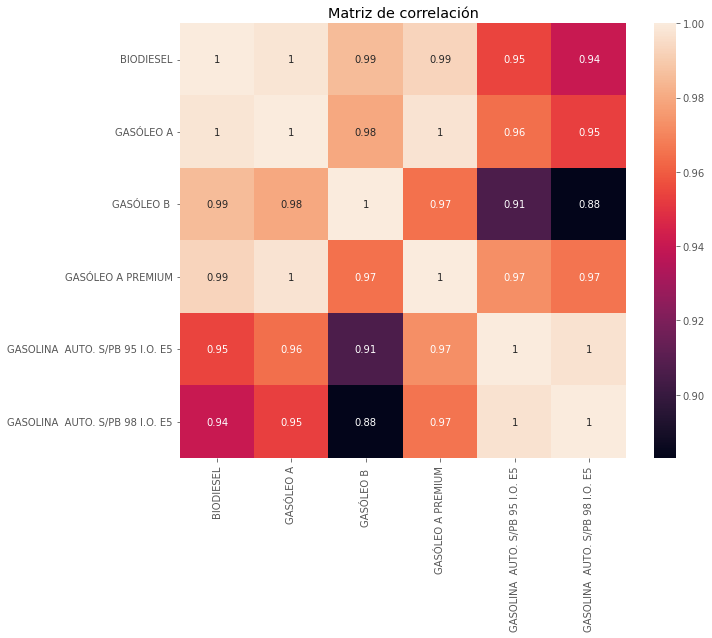

In [ ]:
corr_mat = df.drop(columns=['FECHA']).corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.title('Matriz de correlación')
plt.show()

Puede verse que todas las variables correlan muy alto, como era de esperar debido a su dependencia de un factor único como es el precio del barril de petróleo, sin embargo podemos ver dos grupos diferenciados que correlan mucho más alto, el grupo de las gasolinas y el que incluye los gasóleos y el biodiésel. 

Por tanto, es posible que a la hora de ver la tendencia de los precios o elaborar modelos que predigan los precios futuros, haya ciertas diferencias entre ambos grupos.

## 3.4 Análisis de la serie temporal

### 3.4.1 Descomposición ETS

Para comprender mejor la serie temporal, vamos a hacer una descomposición ETS, siglas, en inglés, de sus 3 componentes fundamentales:

- Error (Ruido) 
- Trend (Tendencia)
- Seasonality (Estacionalidad)

Existen dos formas en las que estas componentes pueden combinarse para dar lugar a la serie temporal, de forma aditiva, en la que las diferentes componentes se suman entre sí, o de forma multiplicativa, en la que se multiplican.

En el caso que nos ocupa he elegido el modelo aditivo.

BIODIESEL


<Figure size 1080x3600 with 0 Axes>

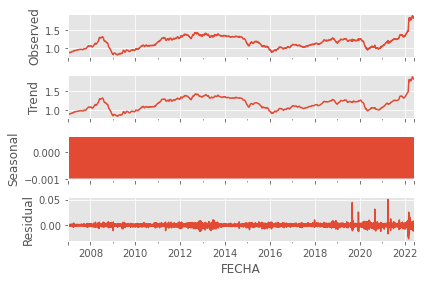

GASÓLEO A


<Figure size 1080x3600 with 0 Axes>

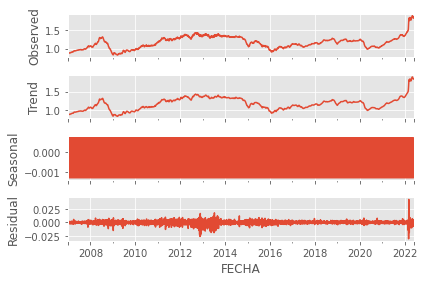

GASÓLEO B 


<Figure size 1080x3600 with 0 Axes>

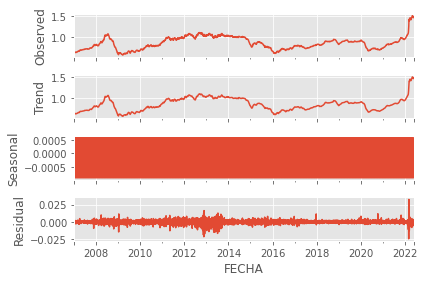

GASÓLEO A PREMIUM


<Figure size 1080x3600 with 0 Axes>

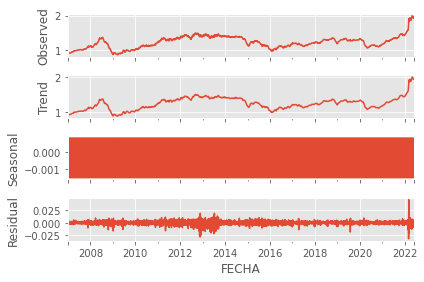

GASOLINA  AUTO. S/PB 95 I.O. E5


<Figure size 1080x3600 with 0 Axes>

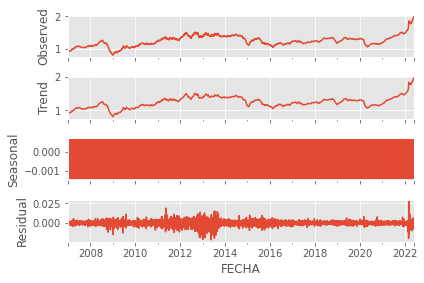

GASOLINA  AUTO. S/PB 98 I.O. E5


<Figure size 1080x3600 with 0 Axes>

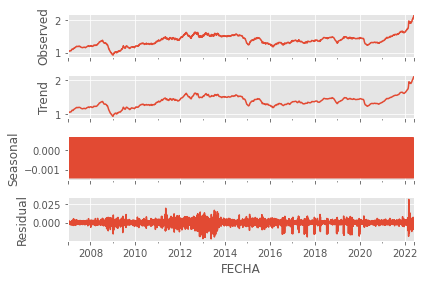

In [ ]:
import statsmodels.api as sm

mask = (df['FECHA'] > '2007-01-01') & (df['FECHA'] <= '2022-05-31')

series = df.loc[mask]
series = series.set_index('FECHA')

for i in series.columns:
  decomp = sm.tsa.seasonal_decompose(series[i], model="add")

  print(i)
  plt.figure(figsize=(15, 50))
  decomp.plot()
  plt.show()

Debido a la gran cantidad de datos presentes, la estacionalidad no se aprecia apropiadamente. Por ello voy a poner el foco en los datos relativos a 2022.

BIODIESEL


<Figure size 1080x3600 with 0 Axes>

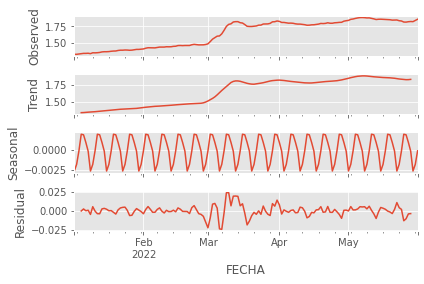

GASÓLEO A


<Figure size 1080x3600 with 0 Axes>

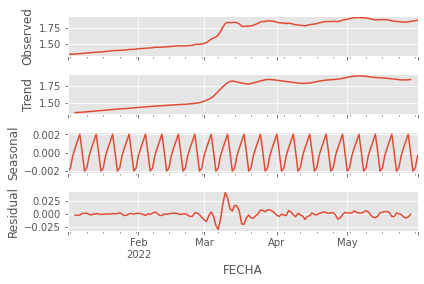

GASÓLEO B 


<Figure size 1080x3600 with 0 Axes>

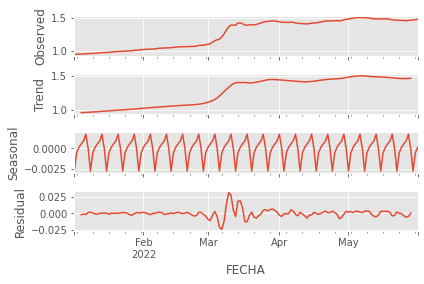

GASÓLEO A PREMIUM


<Figure size 1080x3600 with 0 Axes>

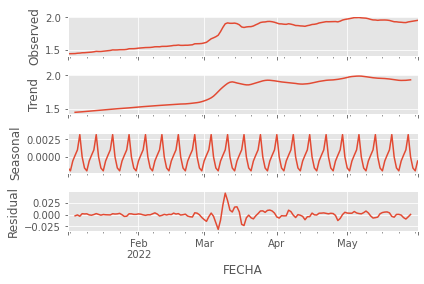

GASOLINA  AUTO. S/PB 95 I.O. E5


<Figure size 1080x3600 with 0 Axes>

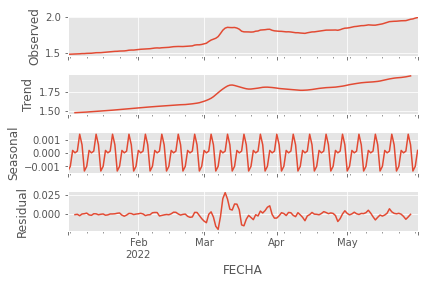

GASOLINA  AUTO. S/PB 98 I.O. E5


<Figure size 1080x3600 with 0 Axes>

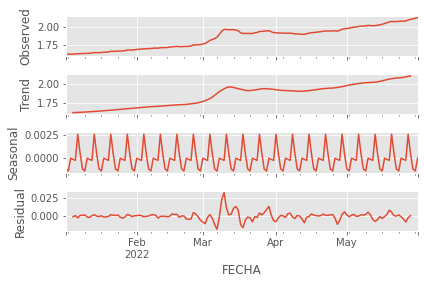

In [ ]:
import statsmodels.api as sm

mask = (df['FECHA'] > '2022-01-01') & (df['FECHA'] <= '2022-05-31')

series = df.loc[mask]
series = series.set_index('FECHA')

for i in series.columns:
  decomp = sm.tsa.seasonal_decompose(series[i], model="add")

  print(i)
  plt.figure(figsize=(15, 50))
  decomp.plot()
  plt.show()

Se pueden apreciar mejor los distintos componentes, sobre todo la estacionalidad.

Como se había comentado previamente, se aprecian diferencias entre los grupos del gasóleo y biodiésel y la gasolina, puesto que se puede ver que en el caso de la gasolina la tendencia es claramente creciente, mientras que para el otro grupo se aprecia una tendencia que parece haberse estabilizado.

### 3.4.2 Visualización alternativa mediante filtro Hodrick-Prescott

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

variable = 'GASOLINA  AUTO. S/PB 98 I.O. E5'

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df[variable], lamb=1600)

In [ ]:
dataset = df
dataset['trend'] = gdp_trend
dataset['cycle'] = gdp_cycle
dataset = dataset.set_index('FECHA')

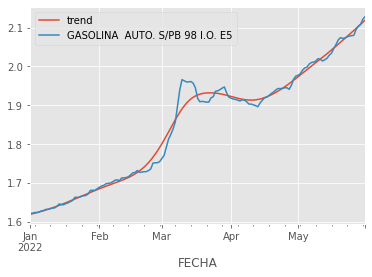

In [ ]:
dataset[['trend',variable]]['2022-01-01':].plot().autoscale(axis='x',tight=True);

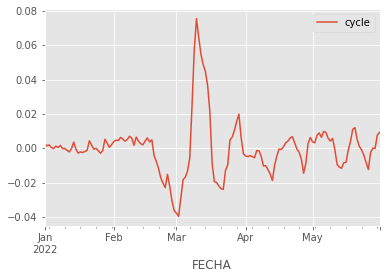

In [ ]:
dataset[['cycle']]['2022-01-01':].plot().autoscale(axis='x',tight=True);

### 3.4.3 Análisis de estacionariedad

Puesto que algunos modelos dan por sentado que la serie temporal es estacionaria, se hace necesario comprobar si lo es o no.

Para ello realizaré el test de hipótesis Augmented Dickey-Fuller.

Se dice que una serie de tiempo es "estacionaria" si no tiene tendencia, exhibe una varianza constante a lo largo del tiempo y tiene una estructura de autocorrelación constante a lo largo del tiempo.

Para ello realizaré el test de hipótesis Augmented Dickey-Fuller, que utiliza las siguientes hipótesis nula y alternativa:

H0: La serie temporal no es estacionaria. En otras palabras, tiene una estructura dependiente del tiempo y no tiene una variación constante en el tiempo.

HA: La serie temporal es estacionaria.

Si el valor p de la prueba es menor que algún nivel de significación (por ejemplo, α = .05), entonces podemos rechazar la hipótesis nula y concluir que la serie de tiempo es estacionaria.

In [ ]:
dataset = df.set_index('FECHA')
#dataset = dataset['2022-01-01':]
for column in dataset.columns:
  print(f'Test Augmented Dickey-Fuller para {column}:')
  dftest = adfuller(dataset[column], autolag='AIC')

  print(f'El p-valor es: {dftest[1]}')
  print()

Test Augmented Dickey-Fuller para BIODIESEL:
El p-valor es: 0.9226760811892357

Test Augmented Dickey-Fuller para GASÓLEO A:
El p-valor es: 0.9159503347588374

Test Augmented Dickey-Fuller para GASÓLEO B :
El p-valor es: 0.8498544311056591

Test Augmented Dickey-Fuller para GASÓLEO A PREMIUM:
El p-valor es: 0.9245475967503481

Test Augmented Dickey-Fuller para GASOLINA  AUTO. S/PB 95 I.O. E5:
El p-valor es: 0.9405398931090141

Test Augmented Dickey-Fuller para GASOLINA  AUTO. S/PB 98 I.O. E5:
El p-valor es: 0.9490415751191675



Como podemos ver, ninguna de las series es estacionaria.

### 3.4.4 Análisis de autocorrelación

La autocorrelación y la autocorrelación parcial son medidas de asociación entre valores de series actuales y pasadas e indican cuáles son los valores de series pasadas más útiles para predecir valores futuros.

Según la **Duke University Statistical Forecasting** (https://people.duke.edu/~rnau/411arim3.htm), si la Función de Autocorrelación Parcial (PACF) muestra un corte brusco mientras que la Función de Autocorrelación (ACF) decae más lentamente (es decir, tiene picos significativos en retrasos más altos), decimos que la serie muestra una "firma AR", lo que significa que el patrón de autocorrelación se puede explicar más fácilmente agregando términos autorregresivos que añadiendo términos MA.

Esto nos puede ser útil para ajustar un modelo ARIMA, puesto que habría que determinar si se necesitan términos AR o MA para corregir cualquier autocorrelación que permanezca en la serie diferenciada.



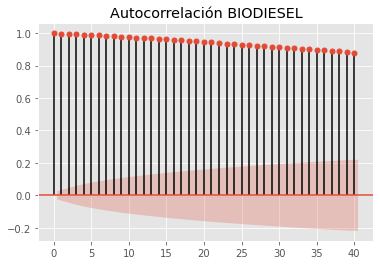

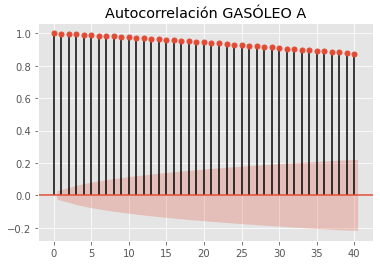

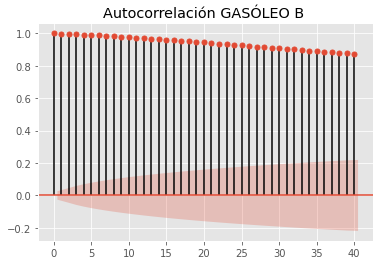

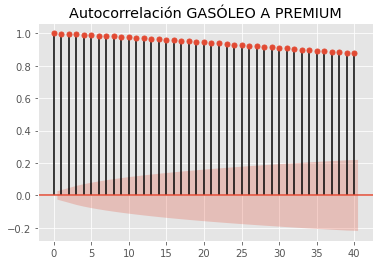

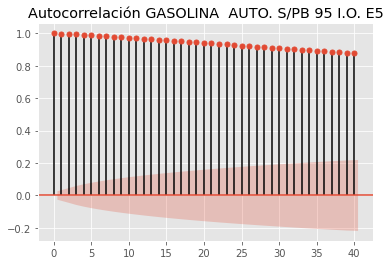

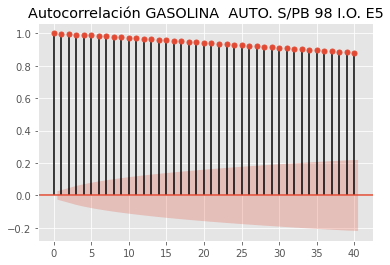

In [ ]:
dataset = df.drop('FECHA', axis = 1)

for column in dataset.columns:
  title = f'Autocorrelación {column}'
  lags = 40
  plot_acf(dataset[column],title=title,lags=lags);

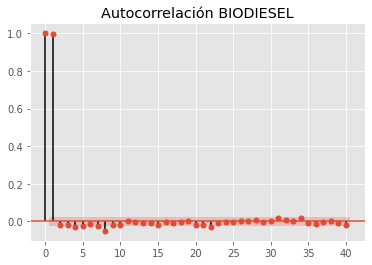

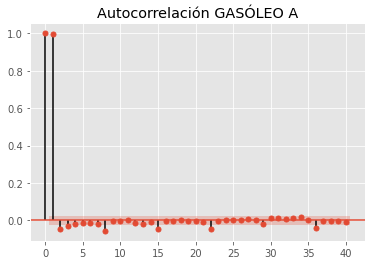

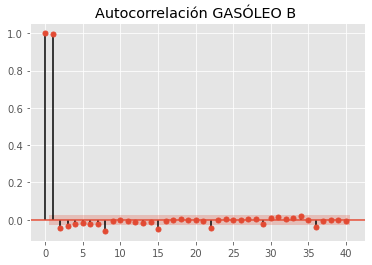

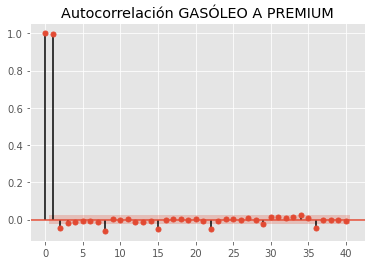

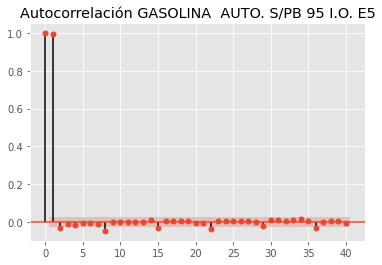

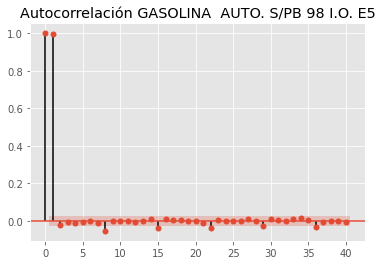

In [ ]:
dataset = df.drop('FECHA', axis = 1)

for column in dataset.columns:
  title = f'Autocorrelación {column}'
  lags = 40
  plot_pacf(dataset[column],title=title,lags=lags);

Tal y como podemos ver, harían falta más términos AR que MA. 

Por otra parte, podemos deducir que, esencialmente, los precios de combustibles no están correlacionados con los precios de días previos.

# 4 Modelado

En esta parte entrenaremos 3 modelos diferentes:
- Modelo AR
- Modelo ARIMA (0,1,0) (Random Walk)
- Modelo ARIMA



Hemos de tener en cuenta tres variables:

- p = orden de la parte autorregresiva (AR).
- d = grado de primera diferenciación involucrada.
- q = orden de la parte de media móvil (MA)

En el caso del modelo AR sólo usaremos el valor p, mientras que para el modelo ARIMA, al estar formado por el modelo autorregresivo (AR) y de media móvil (MA) así como del componente I, que une los modelos previos, usará los 3 parámetros. La combinatoria de estos parámetros hará que el modelo se comporte diferente. 

Debido a la similitud del comportamiento de los diferentes combustibles, sólo usaré uno de ellos a la hora de elaborar los modelos: GASOLINA AUTO. S/PB 98 I.O. E5.

Como paso previo a elaborar los modelos, dividiré el dataset en dos, uno de entrenamiento y otro de prueba.

In [51]:
dataset = df.drop(df.columns[1:-1], axis=1)
dataset = dataset.set_index('FECHA')
dataset

,GASOLINA AUTO. S/PB 98 I.O. E5
FECHA,
2007-01-01,1.068
2007-01-02,1.068
2007-01-03,1.067
2007-01-04,1.067
2007-01-05,1.067
...,...
2022-05-27,2.095
2022-05-28,2.103
2022-05-29,2.108


In [7]:
# 4504 es el 80% de las observaciones totales

train = dataset.iloc[:4504]
test = dataset.iloc[4504:]

## 4.1 AR: Modelo Autorregresivo

Entrenamos el modelo de tal forma que nos indique el valor necesario de p.

In [ ]:
modeloAR = AR(train)
ARfit = modeloAR.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coeficientes:\n{ARfit.params}')

Lag: 31
Coeficientes:
const                                  0.001433
L1.GASOLINA  AUTO. S/PB 98 I.O. E5     1.117643
L2.GASOLINA  AUTO. S/PB 98 I.O. E5    -0.072133
L3.GASOLINA  AUTO. S/PB 98 I.O. E5     0.006018
L4.GASOLINA  AUTO. S/PB 98 I.O. E5     0.000760
L5.GASOLINA  AUTO. S/PB 98 I.O. E5    -0.053193
L6.GASOLINA  AUTO. S/PB 98 I.O. E5     0.036645
L7.GASOLINA  AUTO. S/PB 98 I.O. E5     0.187217
L8.GASOLINA  AUTO. S/PB 98 I.O. E5    -0.274739
L9.GASOLINA  AUTO. S/PB 98 I.O. E5     0.068101
L10.GASOLINA  AUTO. S/PB 98 I.O. E5   -0.065490
L11.GASOLINA  AUTO. S/PB 98 I.O. E5    0.010120
L12.GASOLINA  AUTO. S/PB 98 I.O. E5    0.053031
L13.GASOLINA  AUTO. S/PB 98 I.O. E5   -0.034038
L14.GASOLINA  AUTO. S/PB 98 I.O. E5    0.197644
L15.GASOLINA  AUTO. S/PB 98 I.O. E5   -0.228397
L16.GASOLINA  AUTO. S/PB 98 I.O. E5    0.002193
L17.GASOLINA  AUTO. S/PB 98 I.O. E5    0.050432
L18.GASOLINA  AUTO. S/PB 98 I.O. E5   -0.012645
L19.GASOLINA  AUTO. S/PB 98 I.O. E5   -0.018614
L20.GASOLINA  AUTO

En este caso, el valor idóneo es: p = 31.

In [ ]:
start = len(train)
end = len(dataset)
rename = f'AR({ARfit.k_ar})'

predictions1 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

Elaboramos una predicción en base al modelo generado con el conjunto train, y la comparamos con el conuunto de test.

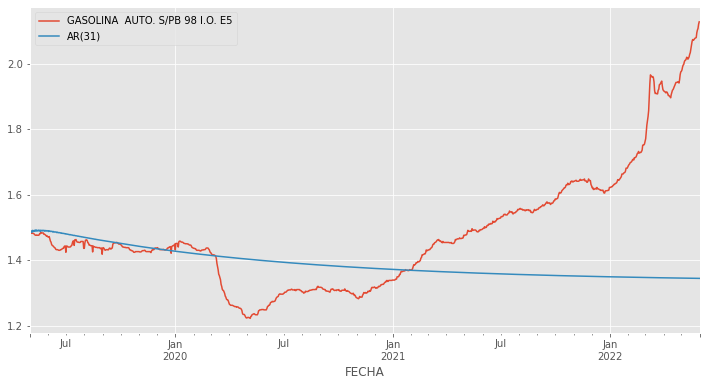

In [ ]:
test.plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

Podemos ver la predicción sobre el dataset entero.

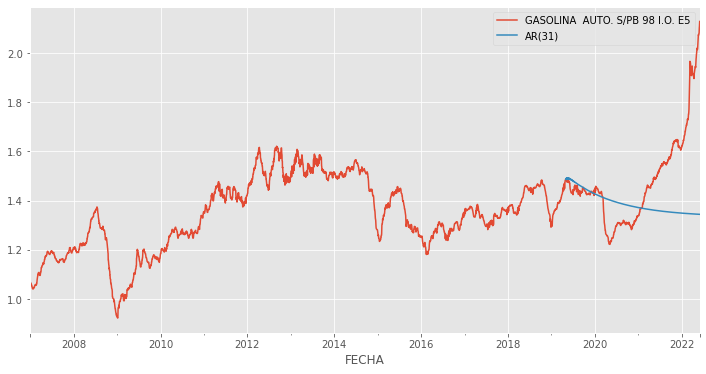

In [ ]:
dataset.plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## 4.2 ARIMA: Modelo Autorregresivo Integrado de Media Móvil

### 4.2.1 Random Walk

A la hora de generar un modelo predictivo es conveniente identificar un modelo base, sobre el que ir comparando cada una de los modelos. Teniendo en cuenta que como hemos visto, no hay autocorrelación, y los precios se comportan de forma aleatoria y dependiente de sucesos geopolíticos, la mejor estimación para el valor tn+1 es el valor tn más un cambio impredecible. Por ello, creamos un modelo ARIMA con valores:

+ p = 0
+ d = 1
+ q = 0

Con estos valores, el ARIMA que obtenemos se comportará de la manera que hemos descrito.

In [ ]:
modeloRW = ARIMA(train,order=(0,1,0))
resultsRW = modeloRW.fit()
resultsRW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     ARIMA Model Results                                     
=============================================================================================
Dep. Variable:     D.GASOLINA  AUTO. S/PB 98 I.O. E5   No. Observations:                 4503
Model:                                ARIMA(0, 1, 0)   Log Likelihood               17707.884
Method:                                          css   S.D. of innovations              0.005
Date:                               Sun, 10 Jul 2022   AIC                         -35411.767
Time:                                       02:06:37   BIC                         -35398.942
Sample:                                   01-02-2007   HQIC                        -35407.248
                                        - 05-01-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.238e-05   7.07e-05      1.307      0.191   -4.61e-05       0.000
==============================================================================
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions3 = resultsRW.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,1,0)')

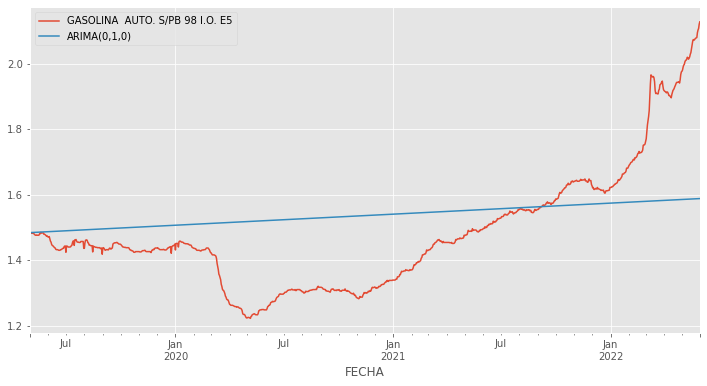

In [ ]:
test.plot(legend=True)
predictions3.plot(legend=True,figsize=(12,6));

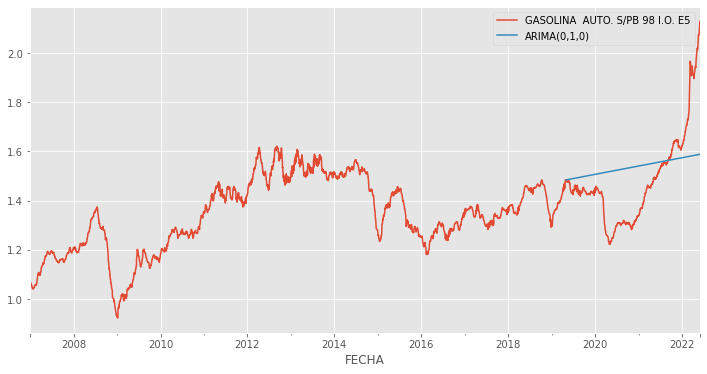

In [ ]:
dataset.plot(legend=True)
predictions3.plot(legend=True,figsize=(12,6));

### 4.2.2 auto_arima

Para elegir los mejores valores de p, d y q usaremos la función auto_arima, que nos devolverá los valores que nos permitirá obtener un modelo óptimo.

In [ ]:
modeloARIMA = auto_arima(train,seasonal=True)
modeloARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4504
Model:               SARIMAX(2, 1, 2)   Log Likelihood               17775.094
Date:                Sun, 10 Jul 2022   AIC                         -35540.188
Time:                        02:09:01   BIC                         -35508.126
Sample:                             0   HQIC                        -35528.891
                               - 4504                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0170      0.064     -0.265      0.791      -0.142       0.109
ar.L2          0.6655      0.041     16.428      0.000       0.586       0.745
ma.L1          0.1465      0.065      2.243      0.025       0.018       0.275
ma.L2         -0.6242      0.039    -16.097      0.000      -0.700      -0.548
sigma2      2.175e-05   2.35e-07     92.673      0.000    2.13e-05    2.22e-05
===================================================================================
Ljung-Box (Q):                     1715.76   Jarque-Bera (JB):              9920.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Como podemos ver, los valores que nos devuelve la función son:

+ p = 2
+ d = 1
+ q = 2

Sin embargo, el modelo que la función nos dice que es más apropiado no es un ARIMA, sino un modelo SARIMAX, un modelo Autorregresivo Integrado de Media Móvil Estacional con regresores exógenos (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors). 

In [ ]:
start = len(train)
end = len(dataset)

predictions5 = pd.Series(modeloARIMA.predict(n_periods=len(dataset)-len(train)), index=test.index).rename('SARIMAX')

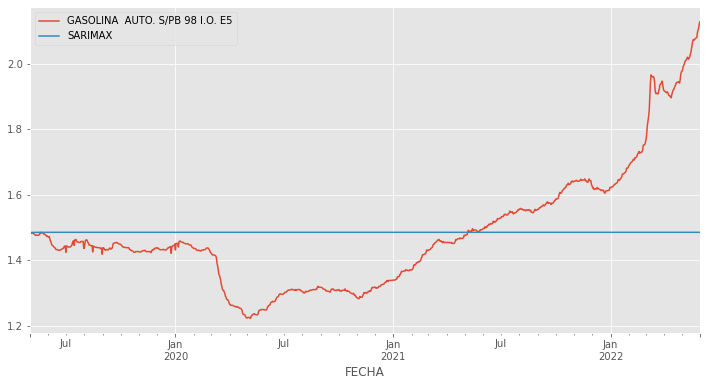

In [ ]:
test.plot(legend=True)
predictions5.plot(legend=True,figsize=(12,6));

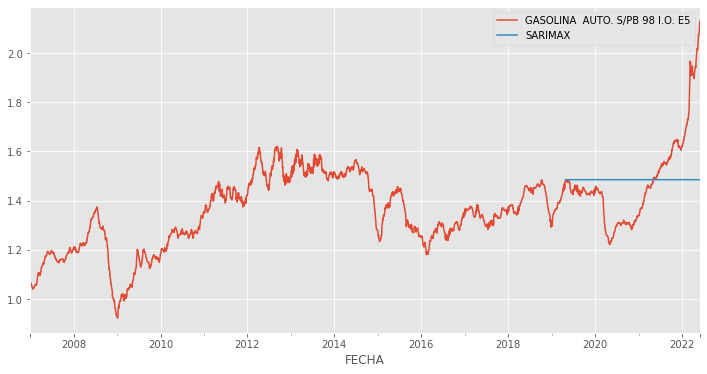

In [ ]:
dataset.plot(legend=True)
predictions5.plot(legend=True,figsize=(12,6));

## 4.3 Evaluación de los modelos

Para evaluar los modelos usaremos el error cuadrático medio de cada una de las dos predicciones con respecto al conjunto de test.

In [ ]:
predictions2 = pd.DataFrame(predictions1, index=test.index)
predictions4 = pd.DataFrame(predictions3, index=test.index)
predictions6 = pd.DataFrame(predictions5, index=test.index)

error1 = rmse(test, predictions2)
error2 = rmse(test, predictions4)
error3 = rmse(test, predictions6)

print("Modelo AR: ", round(error1[0], 6))
print("Modelo ARIMA(0,1,0) (Random Walk): ", round(error2[0], 6))
print("Modelo SARIMAX: ", round(error3[0], 6))

Modelo AR:  0.226107
Modelo ARIMA(0,1,0) (Random Walk):  0.174788
Modelo SARIMAX:  0.184925


El modelo ARIMA (0,1,0) (Random Walk) es el que presenta menos error.

# 5 Predicción

Para finalizar, elaboramos ambos modelo sobre el dataset entero para así poder realizar una predicción de los precios futuros. 

La predicción se ha realizado a 10 años vista.

## 5.1 Modelo AR

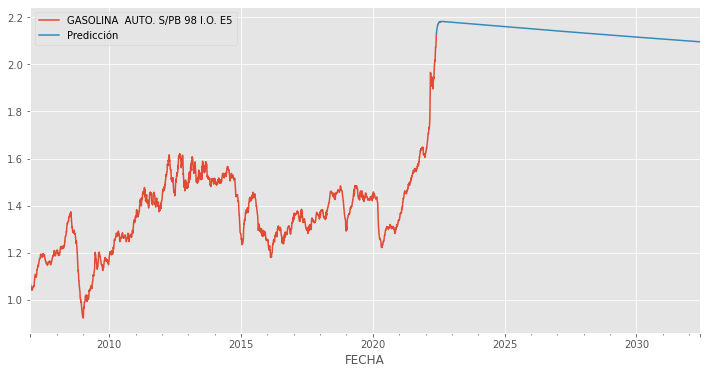

In [ ]:
# First, retrain the model on the full dataset
model = AR(dataset)

# Next, fit the model
ARfit = model.fit(maxlag=31,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+3650, dynamic=False).rename('Predicción')

# Plot the results
dataset.plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

## 5.2 Modelo ARIMA(0,1,0) (Random Walk)

In [ ]:
model = ARIMA(dataset,order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     ARIMA Model Results                                     
=============================================================================================
Dep. Variable:     D.GASOLINA  AUTO. S/PB 98 I.O. E5   No. Observations:                 5629
Model:                                ARIMA(0, 1, 0)   Log Likelihood               22212.024
Method:                                          css   S.D. of innovations              0.005
Date:                               Sun, 10 Jul 2022   AIC                         -44420.049
Time:                                       02:15:12   BIC                         -44406.778
Sample:                                   01-02-2007   HQIC                        -44415.425
                                        - 05-31-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   6.23e-05      3.020      0.003    6.61e-05       0.000
==============================================================================
"""

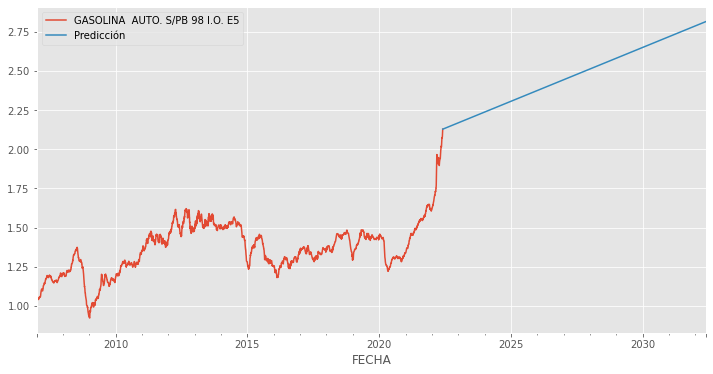

In [ ]:
fcast2 = results.predict(start=len(dataset), end=len(dataset)+3650, dynamic=False, typ='levels').rename('Predicción')

# Plot the results
dataset.plot(legend=True)
fcast2.plot(legend=True,figsize=(12,6));

## 5.3 Modelo SARIMAX

In [ ]:
model = SARIMAX(dataset,order=(2,1,2),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:     GASOLINA  AUTO. S/PB 98 I.O. E5   No. Observations:                 5630
Model:                            SARIMAX(2, 1, 2)   Log Likelihood               22340.600
Date:                             Sun, 10 Jul 2022   AIC                         -44671.200
Time:                                     02:40:25   BIC                         -44638.022
Sample:                                 01-01-2007   HQIC                        -44659.641
                                      - 05-31-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2269      0.215      1.057      0.290      -0.194       0.648
ar.L2          0.5184      0.170      3.048      0.002       0.185       0.852
ma.L1         -0.0993      0.214     -0.465      0.642      -0.518       0.319
ma.L2         -0.4727      0.142     -3.337      0.001      -0.750      -0.195
sigma2      2.087e-05   1.77e-07    118.196      0.000    2.05e-05    2.12e-05
===================================================================================
Ljung-Box (Q):                     1821.86   Jarque-Bera (JB):             17992.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

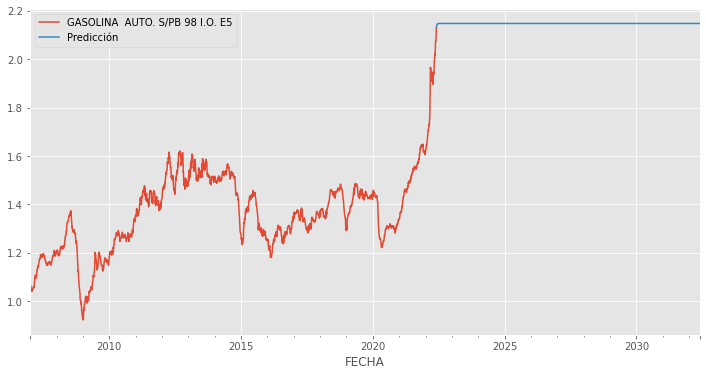

In [ ]:
start=len(train)
end=len(dataset)

fcast3 = results.predict(start=len(dataset), end=len(dataset)+3650, dynamic=False).rename('Predicción')

# Plot the results
dataset.plot(legend=True)
fcast3.plot(legend=True,figsize=(12,6));

La predicción del modelo AR parece más realista que la del modelo SARIMAX, pero esto puede que sea porque no se le ha añadido la variable de regresores exógenos, al carecer de ella.

# 6 Conclusiones

Podemos extraer las siguientes conclusiones:

+ Al visualizar los datos podemos ver que las bajadas y subidas de los precios se relacionan con hechos históricos importantes, tales como crisis, etc. Esto nos indica que los precios de combustibles están mayormente regidos por factores exógenos.
+ Analizando la correlación entre los precios de diferentes combustibles, se podría decir que, a pesar de comportarse prácticamente igual, el grupo de los gasóleos y biodiésel se comportan ligeramente diferente al grupo de las gasolinas (entre los combustibles estudiados).
+ Al realizar el test de hipótesis Augmented Dickey-Fuller sobre las series, obtenemos como resultado que no hay estacionariedad.
+ Del análisis de autocorrelación podemos deducir que los precios de combustibles no están correlacionados con los precios de días previos. Además, harían falta más términos Autorregresivos (AR) que de Medias Móviles (MA) en un posible modelo ARIMA. 
+ Debido al resultado del análisis de autocorrelación, he modelado un modelo AR, para compararlo con el modelo ARIMA. Usando como métrica el error cuadrático medio, el modelo obtenido mediante auto_arima ha presentado menos error.
+ El modelo obtenido mediante auto_arima, SARIMAX, presenta una predicción menos realista que el modelo AR, puesto que en su predicción el modelo SARIMAX no exhibe ninguna variación en su comportamiento, al contrario que el modelo AR, que presenta variación, aunque sea mínima. Esto puede ser causado por no haberle podido añadir la variable de los autorregresores exógenos.